In [2]:
from PIL import Image
from keras.models import load_model
from matplotlib import pyplot as plt
import numpy as np
import os
from tqdm import tqdm

2024-01-03 15:43:39.476355: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-03 15:43:39.886783: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-03 15:43:39.896643: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-03 15:43:39.896684: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [3]:
# model = load_model('./numLayers-2_numUnits-32_dropout-0.2_optimizer-adam_activation-relu_lr-0.0011703880150.h5')
model = load_model('./numLayers-2_numUnits-256_dropout-0.5_optimizer-adam_activation-relu_lr-0.0011704313741.h5')

2024-01-03 15:43:45.363107: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-01-03 15:43:45.363162: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-01-03 15:43:45.363212: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (blankk): /proc/driver/nvidia/version does not exist
2024-01-03 15:43:45.363927: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Load MobileNetV2
from keras.applications import MobileNetV2
from keras.applications.mobilenet import preprocess_input

mobilenet = MobileNetV2(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
# vgg = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3), pooling="max")

In [5]:
def showImage(image):
    plt.imshow(image)
    plt.show()

In [6]:
def linear_diff(np1, np2):
  # np1 = np1.flatten()
  # np2 = np2.flatten()
  return np1 - np2
  

In [16]:
def processImage(image):
    # Resize image
    image = image.resize((224, 224))
    # Convert image to numpy array
    image = np.array(image).astype(np.float32)
    image = np.expand_dims(image, axis=0)
    # Preprocess image
    image = preprocess_input(image)
    # Add batch dimension
    return image

In [23]:
def findMatches(imgPath):
    usersImg = Image.open(imgPath)


    # Process image
    usersImg2 = processImage(usersImg)

    # Extract features from image
    features = mobilenet.predict(usersImg2, verbose=0)

    # Check all image in database
    images = os.listdir('../1Data-Collection/Manual/Centered/')

    predictions = []
    for image in tqdm(images):
        img = Image.open('../1Data-Collection/Manual/Centered/' + image)

        img = processImage(img)

        imgFeatures = mobilenet.predict(img, verbose=0)

        diff = linear_diff(features, imgFeatures)

        prediction = model.predict(diff, verbose=0)
        predictions.append([image, prediction[0][0]])

    # Sort predictions descending
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Show top 10 predictions
    for i in range(10):
        print(predictions[i])

    showImage(usersImg)

    # Show top 5 images
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(10):
        img = Image.open('../1Data-Collection/Manual/Centered/' + predictions[i][0])
        img = np.array(img)
        fig.add_subplot(2, 5, i+1)
        plt.imshow(img)

100%|██████████| 109/109 [00:36<00:00,  3.01it/s]


['NEW_IMG_0657.jpg', 0.9838114]
['IMG_0604.jpg', 0.92358154]
['IMG_0586.jpg', 0.8934704]
['IMG_0598.jpg', 0.87407744]
['NEW_IMG_0633.jpg', 0.8613297]
['IMG_0608.jpg', 0.7155825]
['NEW_IMG_0650.jpg', 0.67752224]
['IMG_0567.jpg', 0.66922826]
['NEW_IMG_0670.jpg', 0.5907569]
['IMG_0557.jpg', 0.58542824]


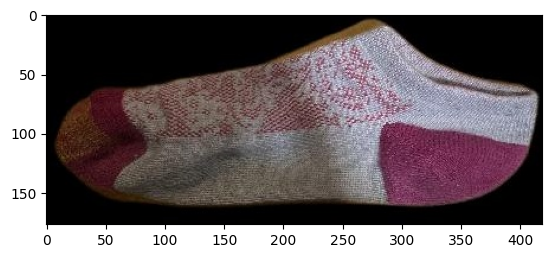

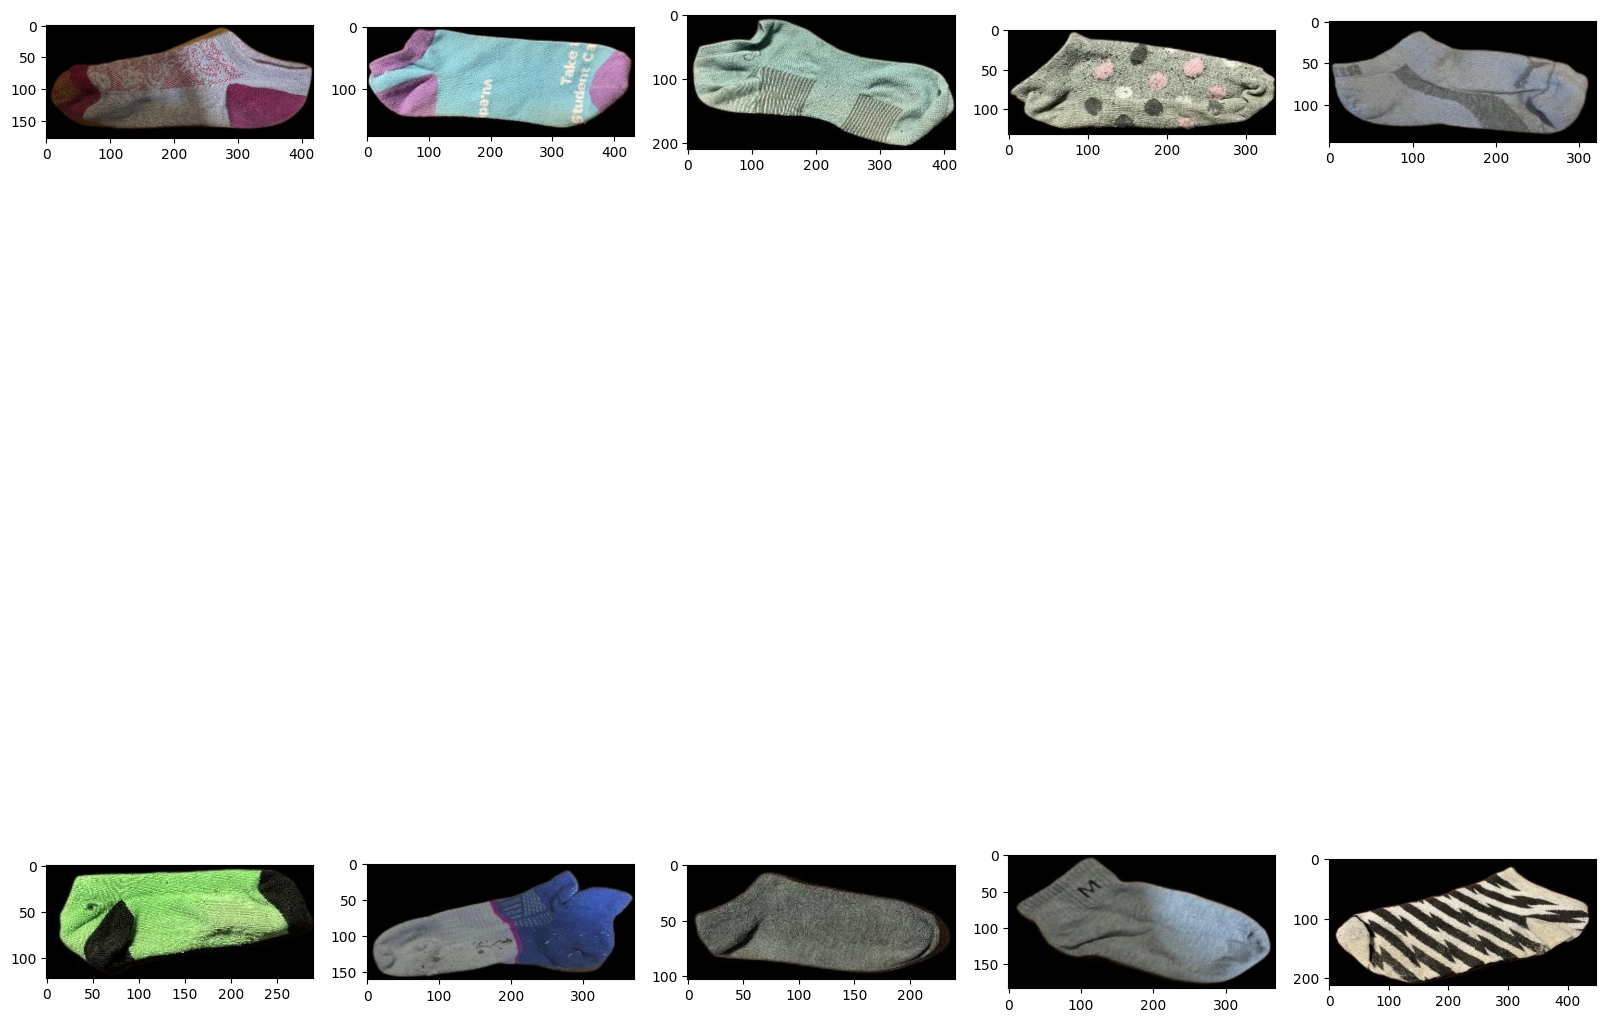

In [24]:
findMatches('./NEW_IMG_0657.jpg')


100%|██████████| 109/109 [00:30<00:00,  3.59it/s]


['NEW_IMG_0659.jpg', 0.9838114]
['NEW_IMG_0671.jpg', 0.94873226]
['NEW_IMG_0628.jpg', 0.91410923]
['NEW_IMG_0674.jpg', 0.84675634]
['NEW_IMG_0637.jpg', 0.76073766]
['NEW_IMG_0622.jpg', 0.75361836]
['IMG_0578.jpg', 0.6149554]
['NEW_IMG_0668.jpg', 0.6033738]
['NEW_IMG_0633.jpg', 0.5358149]
['NEW_IMG_0625.jpg', 0.4988384]


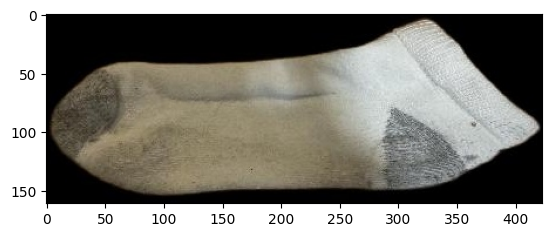

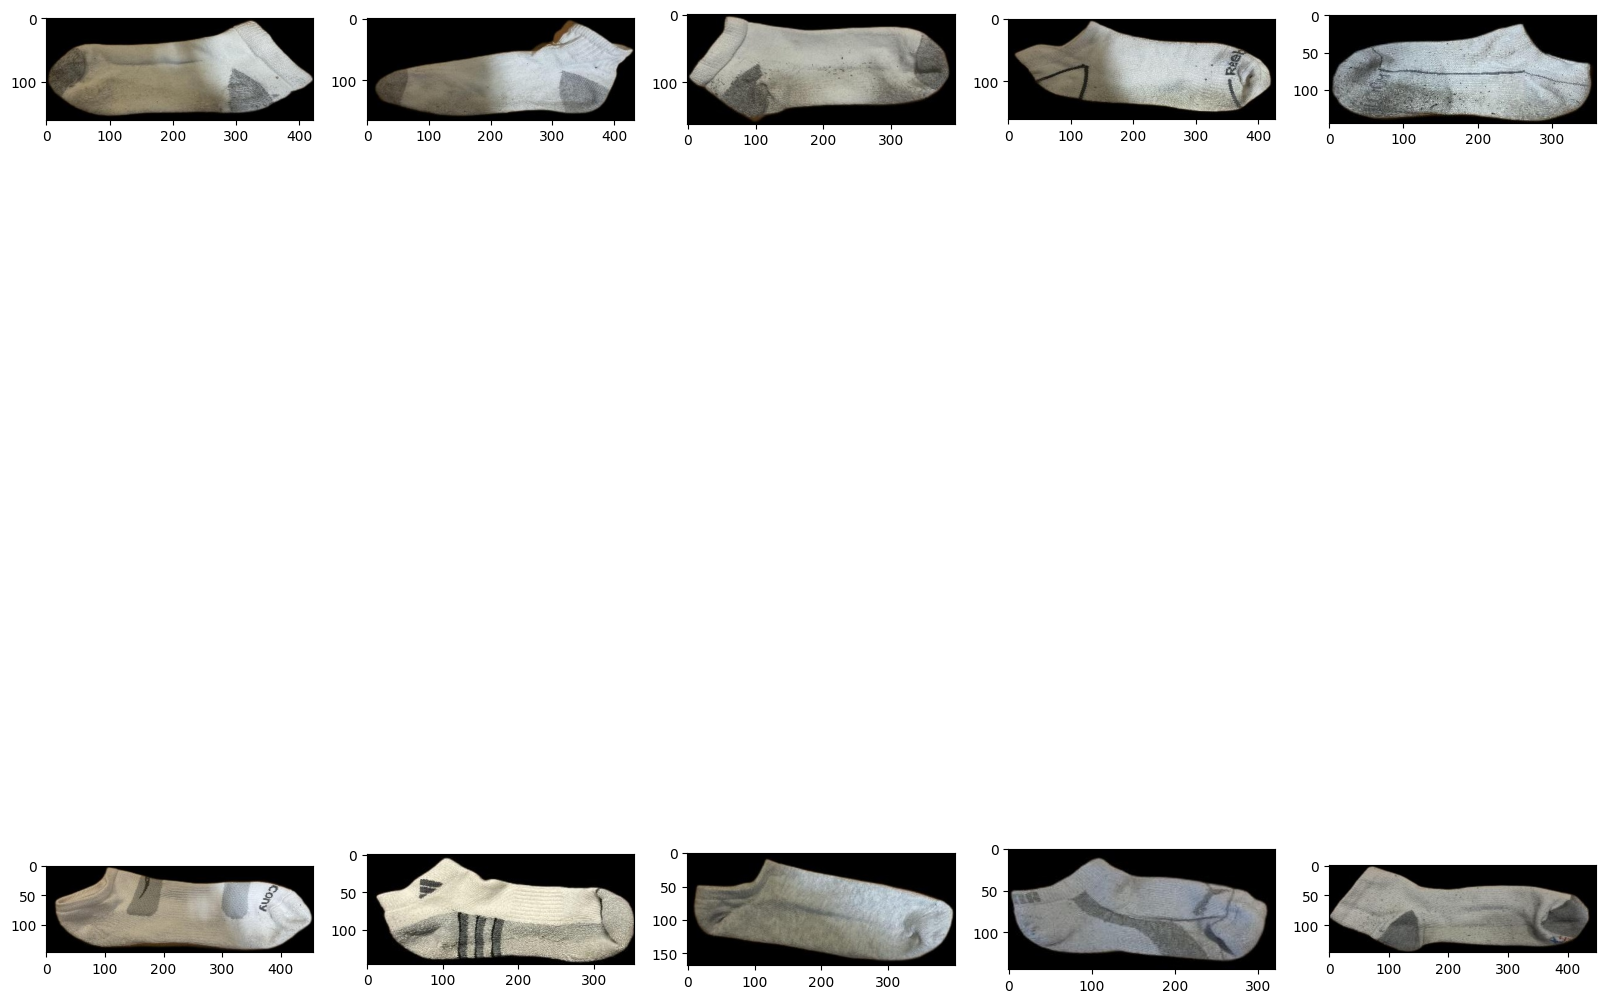

In [25]:
findMatches('./NEW_IMG_0659.jpg')
